In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
file = "../../../../intermediate-results-only-camels\mut_and_host_info_by_tip.json"
with open(file, 'r') as f:
    mut_info_by_tip = json.load(f)

<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
C:\Users\sartz\AppData\Local\Temp\ipykernel_21396\25416800.py:5: SyntaxWarning: invalid escape sequence '\m'
  file = "../../../../intermediate-results-only-camels\mut_and_host_info_by_tip.json"


In [2]:
genes = ["Orf3", "Orf4b"]
mutations = []
rdrp = {}
exon = {}
none = {}
 # go through samples and if there is a stop codon in the gene, see if that sample also has mutations in RdRp
 # create a histogram that has gene on the bottom, number of mutations on the y-axis, and is colored by if the sample has mutations in RdRp or not
for tip, info in mut_info_by_tip.items():
    muts_on_path = info.get('muts_on_path', {})
    for gene in genes: 
        if gene not in muts_on_path.keys():
            continue
        if gene not in rdrp:
            rdrp[gene] = {}
        if gene not in none:
            none[gene] = {}
        if gene not in exon:
            exon[gene] = {}
        for m in muts_on_path[gene]:
            if 'X' in m[-1]:
                mutations.append(m)
                if 'RdRpb' in muts_on_path.keys() or 'RdRpa' in muts_on_path.keys():
                    if m not in rdrp[gene]:
                        rdrp[gene][m] = 1
                    else:
                        rdrp[gene][m] += 1
                if 'ExoN' in muts_on_path.keys():
                    if m not in exon[gene]:
                        exon[gene][m] = 1
                    else:
                        exon[gene][m] += 1
                if 'RdRpb' not in muts_on_path.keys() and 'RdRpa' not in muts_on_path.keys() and 'ExoN' not in muts_on_path.keys():
                    if m not in none[gene]:
                        none[gene][m] = 1
                    else:
                        none[gene][m] += 1

print(rdrp)
print(exon)
print(none)

{'Orf4b': {'R206X': 13, '*247X': 13, 'W67X': 5, 'Y68X': 5, 'K83X': 5, 'Y85X': 5, 'Q15X': 2}, 'Orf3': {'S92X': 2, 'D97X': 2, 'Y100X': 2, 'N103X': 2, '*104X': 32, 'P86X': 1, 'H89X': 11, 'F96X': 19, 'S101X': 8, 'T87X': 11, 'D85X': 10}}
{'Orf4b': {'R206X': 22, '*247X': 22, 'W67X': 14, 'Y68X': 14, 'K83X': 14, 'Y85X': 14, 'Q15X': 2, 'L125X': 1, 'N65X': 1}, 'Orf3': {'S92X': 11, 'D97X': 11, 'Y100X': 11, 'N103X': 11, '*104X': 41, 'H89X': 21, 'F96X': 19, 'S101X': 8, 'T87X': 11, 'D85X': 10}}
{'Orf4b': {}, 'Orf3': {}}


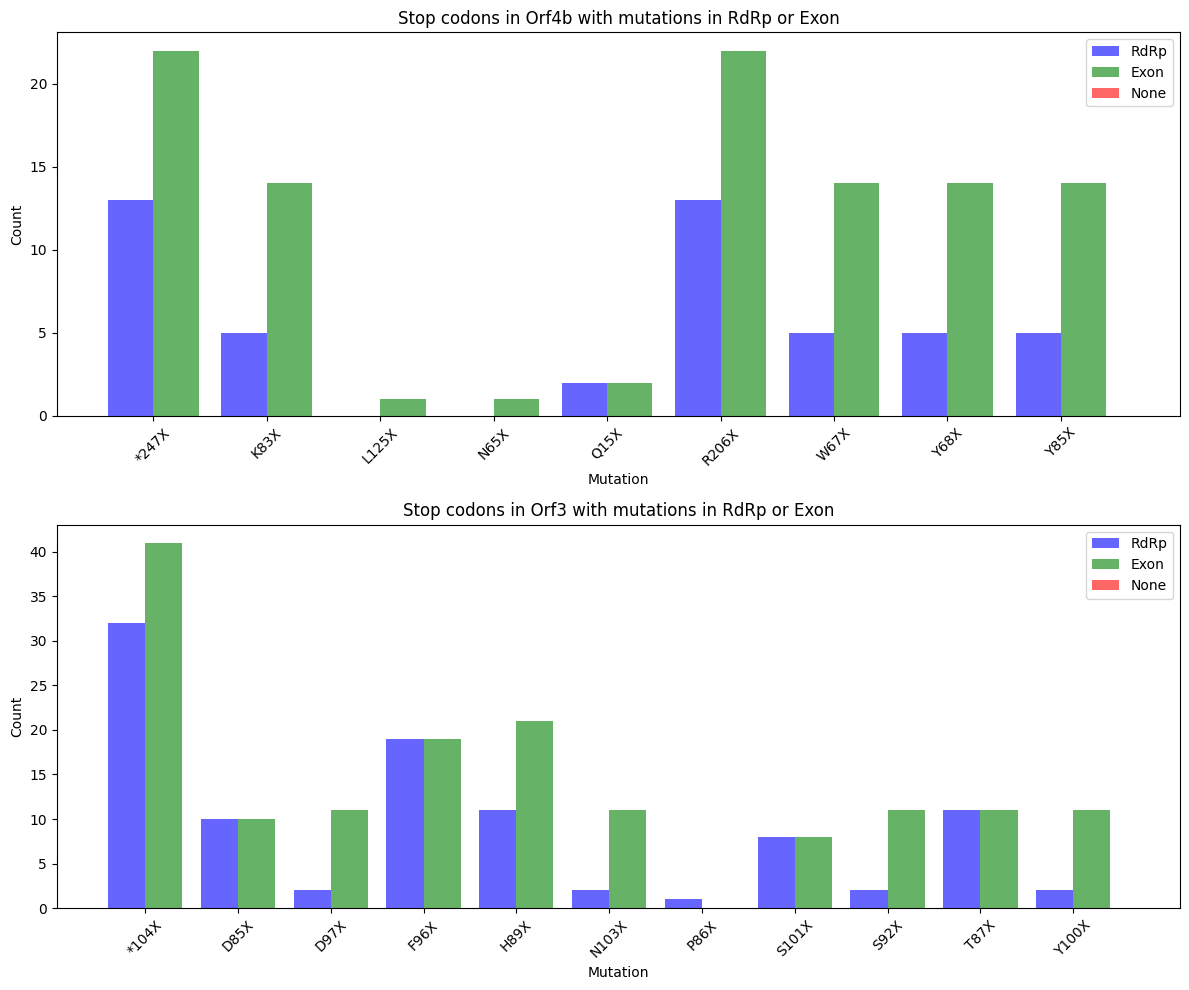

In [3]:
# Plot histograms
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

for i, orf in enumerate(rdrp):
    rdrp_mutations = rdrp[orf]
    exon_mutations = exon[orf]
    no_mutations = none[orf]

    all_mutations = sorted(set(rdrp_mutations.keys()).union(set(exon_mutations.keys())).union(set(no_mutations)))
    
    rdrp_values = [rdrp_mutations.get(mutation, 0) for mutation in all_mutations]
    exon_values = [exon_mutations.get(mutation, 0) for mutation in all_mutations]
    no_values = [no_mutations.get(mutation, 0) for mutation in all_mutations]

    bar_width = 0.4
    bar_positions = list(range(len(all_mutations)))
    
    axes[i].bar([p - bar_width/2 for p in bar_positions], rdrp_values, bar_width, color='blue', alpha=0.6, label='RdRp')

    
    axes[i].bar([p + bar_width/2 for p in bar_positions], exon_values, bar_width, color='green', alpha=0.6, label='Exon')

    axes[i].bar([p + (2*bar_width/2) for p in bar_positions], no_values, bar_width, color='red', alpha=0.6, label='None')

    axes[i].set_title(f'Stop codons in {orf} with mutations in RdRp or Exon')
    axes[i].set_xlabel('Mutation')
    axes[i].set_ylabel('Count')
    axes[i].set_xticks(bar_positions)
    axes[i].set_xticklabels(all_mutations)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend()

plt.tight_layout()
plt.show()